In [1]:
import pandas as pd
import numpy as np
from  sklearn.linear_model import LogisticRegression as LR 

In [2]:
data=pd.read_csv('caicaidata/rankingcard.csv',index_col=0)

In [3]:
# 观察数据类型
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# 观察数据结构
data.shape

(150000, 11)

In [5]:
# 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
# 去除重复值
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [8]:
# 删除之后恢复索引
data.index=range(data.shape[0])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [10]:
# 探索缺失值
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [11]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [12]:
# 填补NumberOfDependents缺失值 我们使用均值填补“家属人数”。
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)

In [13]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

用随机森林填补“收入”。
随机森林利用“既然我可以使用A，B，C去预测Z，那我也可以使用A，C，Z去预测B”的思想来填补缺失值。对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_train，这部分数据既有标签也有特征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。
特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train 特征T不缺失的值：Y_train 特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test 特征T缺失的值：未知，我们需要预测的Y_test这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。

In [15]:
def fill_missing_rf(X,y,to_fill):
#    X：要填补的特征矩阵

# y：完整的，没有缺失值的标签
# to_fill：字符串，要填补的那一列的名称 
# 
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    # 构造 除去缺失值那列和     
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    Ypredict = rfr(n_estimators=100).fit(Xtrain, Ytrain).predict(Xtest)
    return Ypredict

In [16]:
# 创造函数需要的参数，将参数导入函数
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]

In [17]:
data['MonthlyIncome'].isnull().sum()

29221

In [18]:
#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

In [19]:
y_pred.shape

(29221,)

In [20]:
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

日常处理异常值，我们使用箱线图或者法则来找到异常值（千万不要说依赖于眼睛看，我们是数据挖掘工程师，除了业务理解，我们还要有方法）。但在银行数据中，我们希望排除的“异常值”不是一些超高或超低的数字，而是一些不符合常理的数据：比如，收入不能为负数，但是一个超高水平的收入却是合理的，可以存在的。所以在银行业中，我们往往就使用普通的描述性统计来观察数据的异常与否与数据的分布情况。注意，这种方法只能在特征量有限的情况下进行，如果有几百个特征又无法成功降维或特征选择不管用，那还是用比较好。

In [22]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.541637,13249.725050,0.0,0.0,0.180000,1800.000000,4425.000000,7416.000000,10800.000000,23205.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [23]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [24]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""

In [25]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [26]:
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基本可以判断，这些样本是某种异常，应该把它们删除。
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]

In [27]:
#恢复索引
data.index = range(data.shape[0])
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

不统一量纲，也不标准化数据.由于业务要求，在制作评分卡的时候，我们要尽量保持数据的原貌，年龄就是8~110的数字，收入就是大于0，最大值可以无限的数字，即便量纲不统一，我们也不对数据进行标准化处理。

In [28]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [29]:
# 探索样本分布
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [30]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占6.62%; 0占93.38%


可以看出，样本严重不均衡。虽然大家都在努力防范信用风险，但实际违约的人并不多。并且，银行并不会真的一棒子打死所有会违约的人，很多人是会还钱的，只是忘记了还款日，很多人是不愿意欠人钱的，但是当时真的很困难，资金周转不过来，所以发生逾期，但一旦他有了钱，他就会把钱换上。对于银行来说，只要你最后能够把钱还上，我都愿意借钱给你，因为我借给你就有收入（利息）。所以，对于银行来说，真正想要被判别出来的其实是”恶意违约“的人，而这部分人数非常非常少，样本就会不均衡。这一直是银行业建模的一个痛点：我们永远希望捕捉少数类。
之前提到过，逻辑回归中使用最多的是上采样方法来平衡样本

In [31]:
#如果报错，就在prompt安装：pip install imblearn
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(X,y)
# 增加样本违约的抽样次数，上采样
n_sample_ = X.shape[0]
pd.Series(y).value_counts()
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584; 1占50.00%; 0占50.00%


In [32]:
# 分训练集和测试集

from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns


In [33]:
model_data.shape

(195008, 11)

In [34]:
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns


In [35]:
vali_data.shape

(83576, 11)

In [36]:
# 保存训练姐与验证集合
model_data.to_csv("caicaidata/model_data.csv")
vali_data.to_csv("caicaidata/vali_data.csv")

<font color=red size=5 face=雅黑>**分箱 难点**</font>

分箱：将连续变量离散化，最好控制在10个以下，用来制作评分卡最好4-5个位最佳。为了衡量特征信息量以及特征对预测函数的贡献，银行业定义了Information Value（IV）

IV =求和i到N （good%-bad%）*WOEi   ；N箱子个数，i代表每个箱子，good%优质客户所占比例   WOE  证据权重  weight of evidence

WOEi=In(good%/bad%)  本质是优质客户比上坏客户比例的对数。  WOE对于一个箱子来说，WOE越大，代表这个箱子里优质客户越多；IV对整个特征来说的，IV代表的意义，有以下来控制

IV              特征对预测函数的贡献
<0.03           特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除
0.03~0.09       有效信息很少，对模型的贡献度低
0.1~0.29        有效信息一般，对模型的贡献度中等
0.3~0.49        有效信息较多，对模型的贡献度较高
大于0.5         有效信息非常多，对模型的贡献超高并且可疑

可见，V并非越大越好，我们想要找到V的大小和箱子个数的平衡点。所以，我们会对特征进行分箱，然后计算每个特征在每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。

分箱要达成什么效果？  组间差异大，组内差异小。可以用卡方检验对比两个箱子之间的相似性，如果两个箱子之间卡方检验的P值很大，则他们相似，就可以将两个箱子合并成一个箱子。
基于这样的思想，我们总结出我们对一个特征进行分箱的步骤：
1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组
2）确保每一组中都要包含两种类别的样本，否则VI值会无法计算
3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止

4）我们让一个特征分别分成[2，3.4...20）箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数

5）分箱完毕后，我们计算每个箱的WoE值，bad%，观察分箱效果这些步骤都完成后，我们可以对各个特征都进行分箱，然后观察每个特征的I值，以此来挑选特征。
接下来，我们就以“age”为例子，来看看分箱如何完成。

In [93]:
import pandas as pd
import numpy as np
model_data=pd.read_csv("caicaidata/model_data.csv",index_col=0)
vali_data=pd.read_csv("caicaidata/vali_data.csv",index_col=0)


In [94]:
# 等频分箱
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series

现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""

'\npd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化\n只能够处理一维数据。返回箱子的上限和下限\n参数q：要分箱的个数\n参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series\n\n现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限\n'

In [95]:
# 返回20个箱子，以及每个箱子的个数
model_data['qcut'].value_counts()

(36.0, 39.0]      12618
(20.999, 28.0]    11743
(58.0, 61.0]      11389
(45.0, 47.0]      11223
(48.0, 50.0]      11087
(31.0, 34.0]      10818
(50.0, 52.0]      10550
(43.0, 45.0]      10376
(61.0, 64.0]      10183
(39.0, 41.0]       9770
(52.0, 54.0]       9746
(41.0, 43.0]       9708
(28.0, 31.0]       9516
(74.0, 107.0]      9118
(64.0, 68.0]       8904
(54.0, 56.0]       8672
(68.0, 74.0]       8667
(56.0, 58.0]       7914
(34.0, 36.0]       7528
(47.0, 48.0]       5478
Name: qcut, dtype: int64

In [96]:
# 所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [97]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0=model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()["SeriousDlqin2yrs"]
coount_y1=model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()["SeriousDlqin2yrs"]

In [98]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7500),
 (28.0, 31.0, 3571, 5945),
 (31.0, 34.0, 4075, 6743),
 (34.0, 36.0, 2908, 4620),
 (36.0, 39.0, 5182, 7436),
 (39.0, 41.0, 3956, 5814),
 (41.0, 43.0, 4002, 5706),
 (43.0, 45.0, 4389, 5987),
 (45.0, 47.0, 4800, 6423),
 (47.0, 48.0, 2432, 3046),
 (48.0, 50.0, 4900, 6187),
 (50.0, 52.0, 4728, 5822),
 (52.0, 54.0, 4681, 5065),
 (54.0, 56.0, 4677, 3995),
 (56.0, 58.0, 4483, 3431),
 (58.0, 61.0, 6583, 4806),
 (61.0, 64.0, 6968, 3215),
 (64.0, 68.0, 6623, 2281),
 (68.0, 74.0, 6753, 1914),
 (74.0, 107.0, 7737, 1381)]

In [21]:
[*zip([1,2,3],['a','b','c'])]

[(1, 'a'), (2, 'b'), (3, 'c')]

 <font color=red size=5 face=雅黑>**确保每个箱子都有0、1**</font>

In [99]:
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
        continue
"""
合并了之后，第一行的组是否一定有两种样本了呢？不一定
如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
包含两种样本
所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
"""
#已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
#此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
#但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
for i in range(len(num_bins)):
    if 0 in num_bins[i][2:]:
        num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
        break
#如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break
"""
这个break，只有在if被满足的条件下才会被触发
也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in
range(5)
range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
循环就会回到最开始的for i in range(20)中
此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
这样就更新了i的取值，循环就不会报错了
"""

'\n这个break，只有在if被满足的条件下才会被触发\n也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环\n为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历\n但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始\n举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in\nrange(5)\nrange中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历\n进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错\n因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环\n循环就会回到最开始的for i in range(20)中\n此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行\n这样就更新了i的取值，循环就不会报错了\n'

 <font color=red size=5 face=雅黑>**定义WOE和IV函数**</font>

In [100]:
num_bins

[(21.0, 28.0, 4243, 7500),
 (28.0, 31.0, 3571, 5945),
 (31.0, 34.0, 4075, 6743),
 (34.0, 36.0, 2908, 4620),
 (36.0, 39.0, 5182, 7436),
 (39.0, 41.0, 3956, 5814),
 (41.0, 43.0, 4002, 5706),
 (43.0, 45.0, 4389, 5987),
 (45.0, 47.0, 4800, 6423),
 (47.0, 48.0, 2432, 3046),
 (48.0, 50.0, 4900, 6187),
 (50.0, 52.0, 4728, 5822),
 (52.0, 54.0, 4681, 5065),
 (54.0, 56.0, 4677, 3995),
 (56.0, 58.0, 4483, 3431),
 (58.0, 61.0, 6583, 4806),
 (61.0, 64.0, 6968, 3215),
 (64.0, 68.0, 6623, 2281),
 (68.0, 74.0, 6753, 1914),
 (74.0, 107.0, 7737, 1381)]

In [101]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe;columns下限，上限，0个数，1个数
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
#     一个箱子中所有样本数
    df["total"] = df.count_0 + df.count_1
#     一个箱子中样本数占所有样本数的比例
    df["percentage"] = df.total / df.total.sum()
#     坏样本数除以总数
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df


In [102]:
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [103]:
get_woe(num_bins)

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7500,11743,0.060218,0.638678,0.043433,0.077068,-0.573468
1,28.0,31.0,3571,5945,9516,0.048798,0.624737,0.036554,0.061089,-0.513541
2,31.0,34.0,4075,6743,10818,0.055475,0.623313,0.041713,0.069289,-0.507470
3,34.0,36.0,2908,4620,7528,0.038604,0.613709,0.029767,0.047474,-0.466765
4,36.0,39.0,5182,7436,12618,0.064705,0.589317,0.053045,0.076410,-0.364978
5,39.0,41.0,3956,5814,9770,0.050101,0.595087,0.040495,0.059743,-0.388871
6,41.0,43.0,4002,5706,9708,0.049783,0.587763,0.040966,0.058633,-0.358560
7,43.0,45.0,4389,5987,10376,0.053208,0.577005,0.044927,0.061521,-0.314325
8,45.0,47.0,4800,6423,11223,0.057551,0.572307,0.049135,0.066001,-0.295105
9,47.0,48.0,2432,3046,5478,0.028091,0.556042,0.024895,0.031300,-0.228951


In [104]:
# age 的IV值
get_iv(get_woe(num_bins))

0.35406704937258426

 <font color=red size=5 face=雅黑>**卡方检验，合并箱体，画出IV曲线**</font>


In [119]:
num_bins_=num_bins.copy()
import matplotlib.pyplot as plt
import scipy.stats

In [106]:
x1=num_bins_[0][2:]

In [107]:
x2=num_bins_[1][2:]

In [108]:
x2

(3571, 5945)

In [109]:
scipy.stats.chi2_contingency([x1,x2])

(4.334988672430168,
 0.037336664360071756,
 1,
 array([[4316.28025777, 7426.71974223],
        [3497.71974223, 6018.28025777]]))

In [110]:
pvs=[]
for i in range(len(num_bins_)-1):
    x1=num_bins_[i][2:]
    x2=num_bins_[i+1][2:]
    pv=scipy.stats.chi2_contingency([x1,x2])[1]
    pvs.append(pv)

In [111]:
pvs.index(max(pvs))

1

In [112]:
num_bins_[1:3]

[(28.0, 31.0, 3571, 5945), (31.0, 34.0, 4075, 6743)]

In [113]:
num_bins_[1:1+2] = [(num_bins_[1][0],num_bins_[1+1][1],num_bins_[1][2]+num_bins_[1+1][2],num_bins_[1][3]+num_bins_[1+1][3])]

In [114]:
# 只能运行一次
num_bins_

[(21.0, 28.0, 4243, 7500),
 (28.0, 34.0, 7646, 12688),
 (34.0, 36.0, 2908, 4620),
 (36.0, 39.0, 5182, 7436),
 (39.0, 41.0, 3956, 5814),
 (41.0, 43.0, 4002, 5706),
 (43.0, 45.0, 4389, 5987),
 (45.0, 47.0, 4800, 6423),
 (47.0, 48.0, 2432, 3046),
 (48.0, 50.0, 4900, 6187),
 (50.0, 52.0, 4728, 5822),
 (52.0, 54.0, 4681, 5065),
 (54.0, 56.0, 4677, 3995),
 (56.0, 58.0, 4483, 3431),
 (58.0, 61.0, 6583, 4806),
 (61.0, 64.0, 6968, 3215),
 (64.0, 68.0, 6623, 2281),
 (68.0, 74.0, 6753, 1914),
 (74.0, 107.0, 7737, 1381)]

 <font color=red size=5 face=雅黑>**卡方检验，合并箱体，画出IV曲线  完整代码**</font>

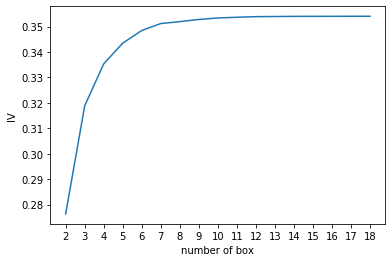

In [115]:
IV = []
# x轴长度 箱子的个数 以及箱子个数对应的IV在IV列表中
axisx = []
while len(num_bins_) > 2:
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
        # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]
   
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()


用最佳分箱个数分箱，并验证分箱结果

In [116]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [120]:
afterbins = get_bin(num_bins_,6)

In [121]:
afterbins

[(21.0, 36.0, 14797, 24808),
 (36.0, 54.0, 39070, 51486),
 (54.0, 61.0, 15743, 12232),
 (61.0, 64.0, 6968, 3215),
 (64.0, 74.0, 13376, 4195),
 (74.0, 107.0, 7737, 1381)]

In [122]:
bins_df = get_woe(num_bins_)

In [123]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24808,39605,0.203094,0.626386,0.151467,0.254919,-0.520577
1,36.0,54.0,39070,51486,90556,0.464371,0.568554,0.399934,0.529055,-0.279791
2,54.0,61.0,15743,12232,27975,0.143456,0.437248,0.161151,0.125692,0.248505
3,61.0,64.0,6968,3215,10183,0.052218,0.315722,0.071327,0.033036,0.769665
4,64.0,74.0,13376,4195,17571,0.090104,0.238746,0.136922,0.043107,1.155733
5,74.0,107.0,7737,1381,9118,0.046757,0.151459,0.079199,0.014191,1.719370



 <font color=red size=5 face=雅黑>**将选取最佳分箱个数的过程包装为函数**</font>

In [128]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
            自动最优分箱函数，基于卡方检验的分箱
            参数：
            DF: 需要输入的数据
            X: 需要分箱的列名
            Y: 分箱数据对应的标签 Y 列名
            n: 保留分箱个数
            q: 初始分箱的个数
            graph: 是否要画出IV图像
            区间为前开后闭 (]
            """
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0],num_bins[i+1][1],num_bins[i][2]+num_bins[i+1][2],num_bins[i][3]+num_bins[i+1][3])]
#         bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(pd.DataFrame(get_woe(num_bins))))
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return pd.DataFrame(get_woe(num_bins))

In [125]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

In [126]:
len(model_data.columns)

12

RevolvingUtilizationOfUnsecuredLines


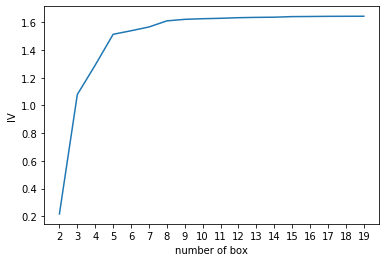

age


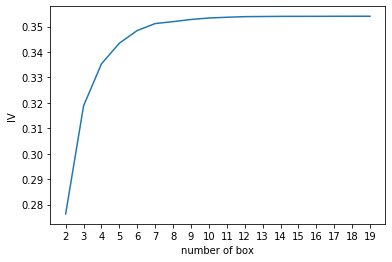

NumberOfTime30-59DaysPastDueNotWorse


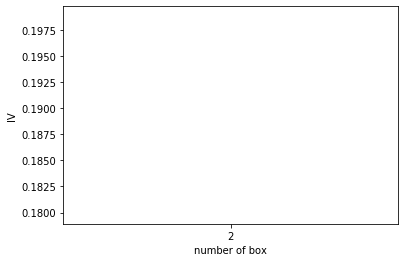

DebtRatio


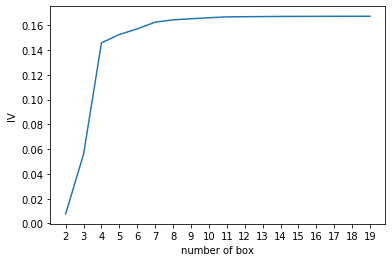

MonthlyIncome


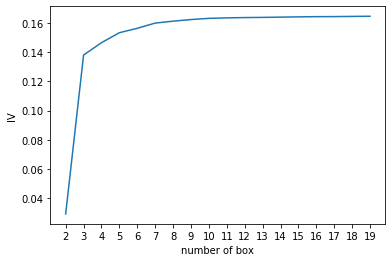

NumberOfOpenCreditLinesAndLoans


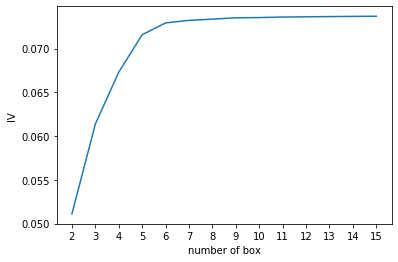

NumberOfTimes90DaysLate


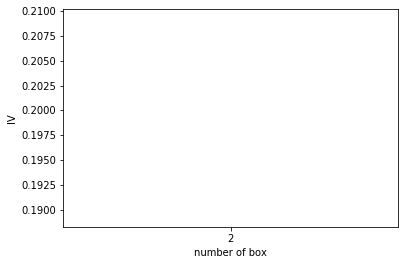

NumberRealEstateLoansOrLines


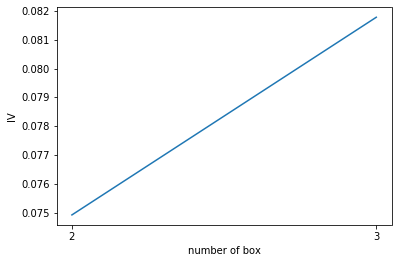

NumberOfTime60-89DaysPastDueNotWorse


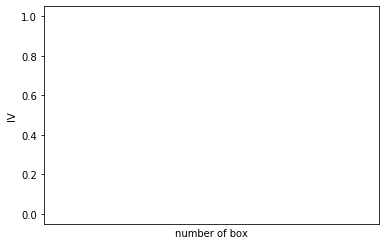

NumberOfDependents


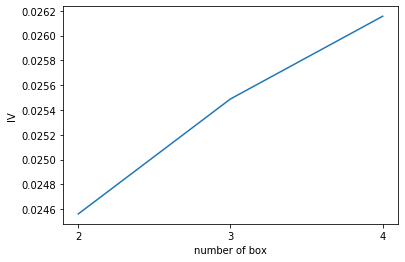

In [129]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=2,q=20)

以DebtRatio为例，根据IV值的变化幅度由大变小的点，选择最佳分箱数为4，其他变量以此类推...根据IV曲线找出的分箱结果如下：

In [130]:
auto_bins = {'RevolvingUtilizationOfUnsecuredLines':5
            ,'age':5
            ,'DebtRatio':4
            ,'MonthlyIncome':3
            ,'NumberOfOpenCreditLinesAndLoans':5
            }

In [134]:
# 以下变量手动分箱
hand_bins = {'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13]
            ,'NumberOfTimes90DaysLate':[0,1,2,17]
            ,'NumberRealEstateLoansOrLines':[0,1,2,4,54]
            ,'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8]
            ,'NumberOfDependents':[0,1,2,3]
            }


In [131]:
model_data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,195008.0,0.499041,0.500000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,195008.0,4.695673,151.637347,0.0,0.0,0.015473,0.099030,0.465182,0.874423,1.000000,1.354928,18300.0
age,195008.0,49.063177,13.914073,21.0,24.0,31.000000,39.000000,48.000000,58.000000,68.000000,84.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,195008.0,0.422070,0.869649,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,13.0
DebtRatio,195008.0,332.459568,1845.188395,0.0,0.0,0.075908,0.208051,0.401743,0.848009,994.939929,5147.247759,329664.0
MonthlyIncome,195008.0,5155.998513,11388.611587,0.0,0.0,0.310000,2000.000000,4166.929279,6900.000000,10241.090012,22000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,195008.0,7.991380,5.018661,0.0,0.0,2.000000,4.000000,7.000000,11.000000,15.000000,23.000000,57.0
NumberOfTimes90DaysLate,195008.0,0.225678,0.717794,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,17.0
NumberRealEstateLoansOrLines,195008.0,0.878938,1.124932,0.0,0.0,0.000000,0.000000,1.000000,1.000000,2.000000,5.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,195008.0,0.117057,0.421753,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.0


In [135]:
# 用-np.inf,np.inf替换最小值和最大值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [136]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [137]:
# 对所有特征分箱：
bins_of_col = {}
for col in auto_bins:
    bins_df = graphforbestbin(model_data,col,'SeriousDlqin2yrs',n = auto_bins[col],q=20,graph=False)
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    #保证区间覆盖使用np.inf替换最大值-np.inf替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [138]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0990299395,
  0.29786658020000006,
  0.46518242400000004,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.01732981905, 0.5035467662, 1.467804642400001, inf],
 'MonthlyIncome': [-inf, 0.10208715260000002, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf]}

In [139]:
# 合并手动分箱的结果
bins_of_col.update(hand_bins)
bins_of_col 

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0990299395,
  0.29786658020000006,
  0.46518242400000004,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.01732981905, 0.5035467662, 1.467804642400001, inf],
 'MonthlyIncome': [-inf, 0.10208715260000002, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [140]:
# 例子

data=model_data.copy()

In [142]:
data=data[['age','SeriousDlqin2yrs']].copy()

In [145]:
data['cut']=pd.cut(data['age'], [-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])

In [146]:
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 74.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(61.0, 74.0]"
4,53,1,"(36.0, 54.0]"
...,...,...,...
195003,32,1,"(-inf, 36.0]"
195004,50,1,"(36.0, 54.0]"
195005,46,1,"(36.0, 54.0]"
195006,64,0,"(61.0, 74.0]"


In [151]:
# unstatck 用来将树状结构变成表结构
bins_df=data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()

In [152]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [153]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24808,-0.520577
"(36.0, 54.0]",39070,51486,-0.279791
"(54.0, 61.0]",15743,12232,0.248505
"(61.0, 74.0]",20344,7410,1.006120
"(74.0, inf]",7737,1381,1.719370


In [154]:
 # 包装成函数    df  数据表 col 每一列名称 y标签  bins 要分箱子的名字
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins) 
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    iv = np.sum((bins_df[0]/bins_df[0].sum()-bins_df[1]/bins_df[1].sum())*bins_df['woe'])
    return woe
    #return iv

In [155]:
woeall = {}
#IV = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    #IV[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])

In [156]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.200749
 (0.099, 0.298]    0.669429
 (0.298, 0.465]   -0.126753
 (0.465, 1.0]     -0.944938
 (1.0, inf]       -2.041013
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.520577
 (36.0, 54.0]   -0.279791
 (54.0, 61.0]    0.248505
 (61.0, 74.0]    1.006120
 (74.0, inf]     1.719370
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0173]     1.502248
 (0.0173, 0.504]   -0.009915
 (0.504, 1.468]    -0.474423
 (1.468, inf]       0.176126
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.102]      1.411034
 (0.102, 5600.0]   -0.236376
 (5600.0, inf]      0.234078
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.846576
 (1.0, 3.0]    -0.329458
 (3.0, 5.0]    -0.055502
 (5.0, 17.0]    0.124218
 (17.0, inf]    0.458476
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353540
 (0.0, 1.0]    -0.874131
 (1.0, 2.0]    -1.374173
 (2.0, inf]    -1.550609
 dtype: float64,
 'NumberOfTimes90D

接下来，将WOE映射到原始数据中，形成建模数据。

In [157]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0990299395,
  0.29786658020000006,
  0.46518242400000004,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.01732981905, 0.5035467662, 1.467804642400001, inf],
 'MonthlyIncome': [-inf, 0.10208715260000002, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [167]:
model_woe = pd.DataFrame(index=model_data.index)

In [169]:
model_woe['age'] = pd.cut(model_data['age'],bins_of_col['age']).map(woeall['age'])

In [170]:
model_woe

,age
0,-0.279791
1,1.006120
2,-0.279791
3,1.006120
4,-0.279791
...,...
195003,-0.520577
195004,-0.279791
195005,-0.279791
195006,1.006120


In [172]:
# 把所有列都添加进去
model_woe = pd.DataFrame(index=model_data.index)

for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
model_woe.head()  #这就是建模数据

In [189]:
woeall_vali = {}
for col in bins_of_col:
    woeall_vali[col] = get_woe(vali_data,col,"SeriousDlqin2yrs",bins_of_col[col])

建模与模型验证

In [175]:
vali_woe = pd.DataFrame(index=vali_data.index)

In [190]:
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall_vali[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]

In [191]:
# 测试集映射
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.231419,0.231029,1.460716,-0.247629,-0.068402,0.358154,0.237895,-0.406980,0.12289,0.659245,0
1,-1.097582,-0.271225,-0.004268,0.254828,0.134343,0.358154,0.237895,0.648744,0.12289,-0.487327,1
2,2.231419,1.014099,-0.004268,0.254828,-0.068402,0.358154,0.237895,-0.406980,0.12289,0.659245,0
3,2.231419,-0.271225,-0.004268,-0.247629,0.134343,0.358154,0.237895,0.204606,0.12289,0.659245,0
4,-1.097582,-0.271225,-0.004268,-0.247629,0.134343,0.358154,0.237895,-0.406980,0.12289,-0.543200,1


In [192]:
# 训练集和测试集
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [194]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR().fit(x,y)
lr.score(vali_x,vali_y)

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.787678280846176

In [195]:
# 模型调参
c_1=np.linspace(0.01,1,20)

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric va

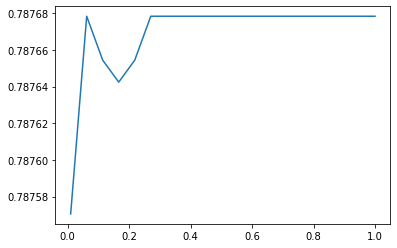

In [199]:
score=[]
for i in c_1:
    lr=LR(solver='liblinear',C=i).fit(x,y)
    score.append(lr.score(vali_x,vali_y))
    
plt.figure()
plt.plot(c_1,score)
plt.show()


In [200]:
lr.n_iter_

array([5], dtype=int32)

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be remo

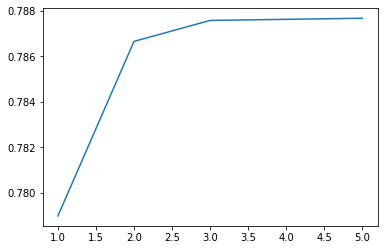

In [202]:
score=[]
for i in [1,2,3,4,5]:
    lr=LR(solver='liblinear',C=0.3,max_iter=i).fit(x,y)
    score.append(lr.score(vali_x,vali_y))
    
plt.figure()
plt.plot([1,2,3,4,5],score)
plt.show()

    

绘制ROC曲线，ROC=0.94，曲线越往左上凸，True Positive 就越高，对应的False Positive越低

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


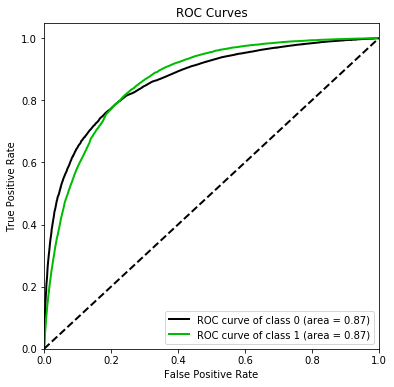

In [204]:
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))
skplt.metrics.plot_roc(vali_y,vali_proba_df,
                      plot_micro=False,figsize=(6,6),
                      plot_macro=False)

混淆矩阵

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


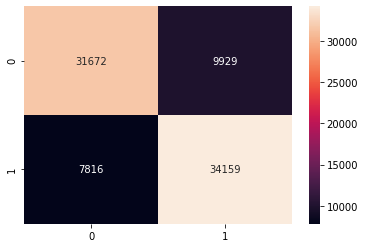

In [213]:
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns
y_pred=LR().fit(x,y).predict(vali_x)
C2 = confusion_matrix(vali_y,y_pred)
sns.heatmap(C2,annot=True,fmt='d')

In [214]:
准确率 = TP \ (TP+FP) = 0.8138
召回率 = TP \ (TP+FN) = 0.7613

In [214]:
f1_score(vali_y,y_pred)

0.7938138340517993

 <font color=red size=5 face=雅黑>**制作评分卡**</font>

分数：score =A-B*log(odds)  其中A叫补偿 B叫刻度 log(odds)代表一个人违约的可能性。基础分就是截距。 基于以下假设

1某个特定的违约概率下的预期分值   2指定违约概率翻倍的分数 PDO

自己假如对数几率是1/60时设定的特定分数是600，PDO=20；那么对数几率为1/30时的分数就是620 带入公式可得

600=A-B*log(1/60)   620=A-B*log(1/30)

In [220]:
B=20/np.log(2)
A=600+B*np.log(1/60)

In [221]:
A,B

(481.8621880878296, 28.85390081777927)

In [223]:
lr.intercept_

array([-0.00129755])

In [224]:
# 基础得分
base_score=A-B*lr.intercept_

In [225]:
base_score

array([481.89962751])

In [226]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.200749
 (0.099, 0.298]    0.669429
 (0.298, 0.465]   -0.126753
 (0.465, 1.0]     -0.944938
 (1.0, inf]       -2.041013
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.520577
 (36.0, 54.0]   -0.279791
 (54.0, 61.0]    0.248505
 (61.0, 74.0]    1.006120
 (74.0, inf]     1.719370
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0173]     1.502248
 (0.0173, 0.504]   -0.009915
 (0.504, 1.468]    -0.474423
 (1.468, inf]       0.176126
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.102]      1.411034
 (0.102, 5600.0]   -0.236376
 (5600.0, inf]      0.234078
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.846576
 (1.0, 3.0]    -0.329458
 (3.0, 5.0]    -0.055502
 (5.0, 17.0]    0.124218
 (17.0, inf]    0.458476
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353540
 (0.0, 1.0]    -0.874131
 (1.0, 2.0]    -1.374173
 (2.0, inf]    -1.550609
 dtype: float64,
 'NumberOfTimes90D

In [234]:
score_age=woeall['age']*lr.coef_[0][1]*B

In [235]:
score_age

cut
(-inf, 36.0]     4.459195
(36.0, 54.0]     2.396649
(54.0, 61.0]    -2.128656
(61.0, 74.0]    -8.618284
(74.0, inf]    -14.727890
dtype: float64

In [240]:
file='caicaidata/ScoreData.csv'
# open用来打开文件的命令，第一个参数路径+文件名，如果在根目录下，只要文件名即可
# 第二个参数是打开文件后的用途，w 写入，r 读取
# 首先写入基准分数  之后用循环，每次生成一组score_age类别的分档和分数，不断写入文件之中


with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(x.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")
  

In [238]:
[*enumerate(x.columns)]

[(0, 'RevolvingUtilizationOfUnsecuredLines'),
 (1, 'age'),
 (2, 'DebtRatio'),
 (3, 'MonthlyIncome'),
 (4, 'NumberOfOpenCreditLinesAndLoans'),
 (5, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (6, 'NumberOfTimes90DaysLate'),
 (7, 'NumberRealEstateLoansOrLines'),
 (8, 'NumberOfTime60-89DaysPastDueNotWorse'),
 (9, 'NumberOfDependents')]

到此结束，多数时间是处理数据。代码可以改进，运行不明原因出现bug